In [3]:
#ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import datasets
from sklearn.datasets import fetch_california_housing
%matplotlib inline

#準備
#データロード
california = fetch_california_housing()
print(california['DESCR'])

df = pd.DataFrame(california.data) #データをndarray(numpy)でなく, pandasのDataFrameで取得
df.columns = california.feature_names

df['Price'] = california.target

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df.head() #dfをpandasのDataFrameで取得しておいたからpandasのheadメソッドを使える！！！

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#基本情報の確認
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
#欠損値がないかの確認
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
#重複値がないかも確認
df.duplicated().sum()

0

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

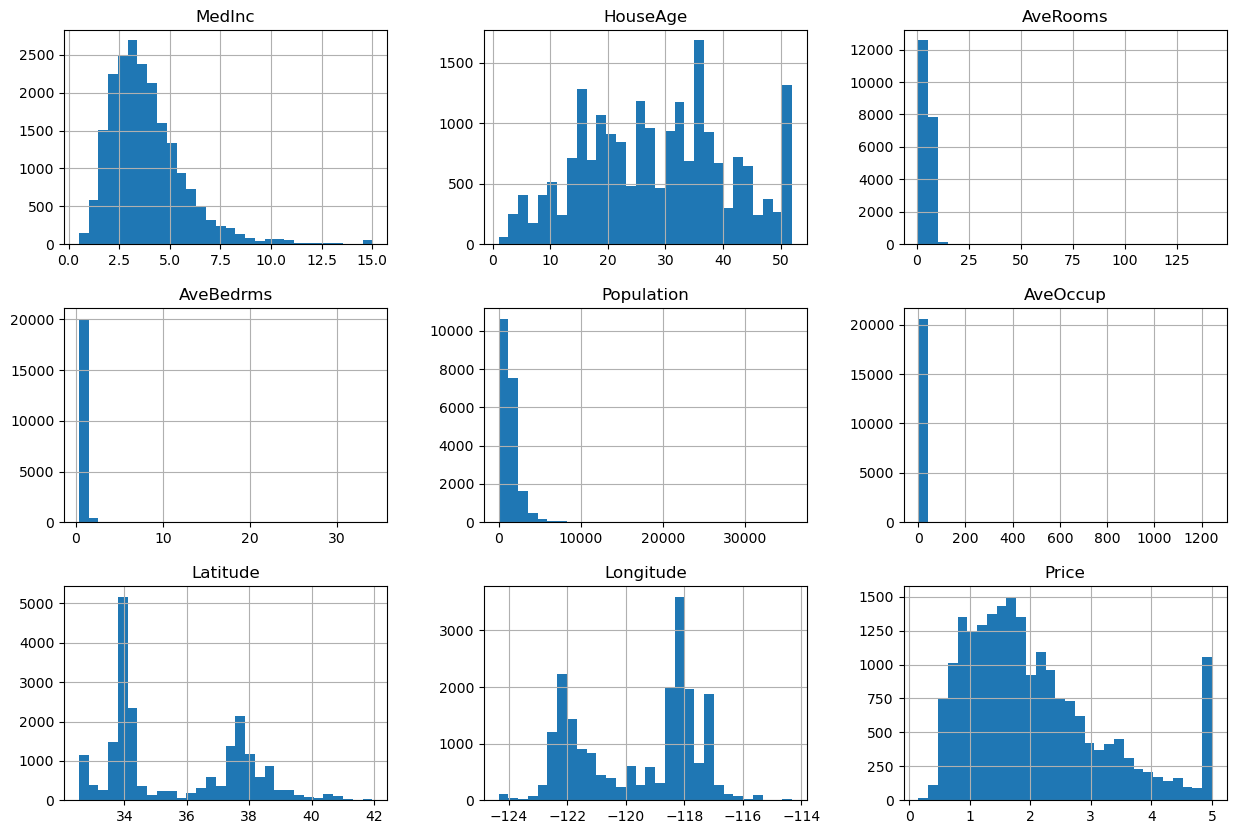

In [8]:
#分布の確認(外れ値をみる)
df.hist(bins=30, figsize=(15, 10))

In [9]:
q = df['AveBedrms'].quantile(0.99)
df_1 = df[df['AveBedrms'] < q]

#確かにデータ数が減ってる
print(len(df['AveBedrms']))
print(len(df_1['AveBedrms']))

20640
20433


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

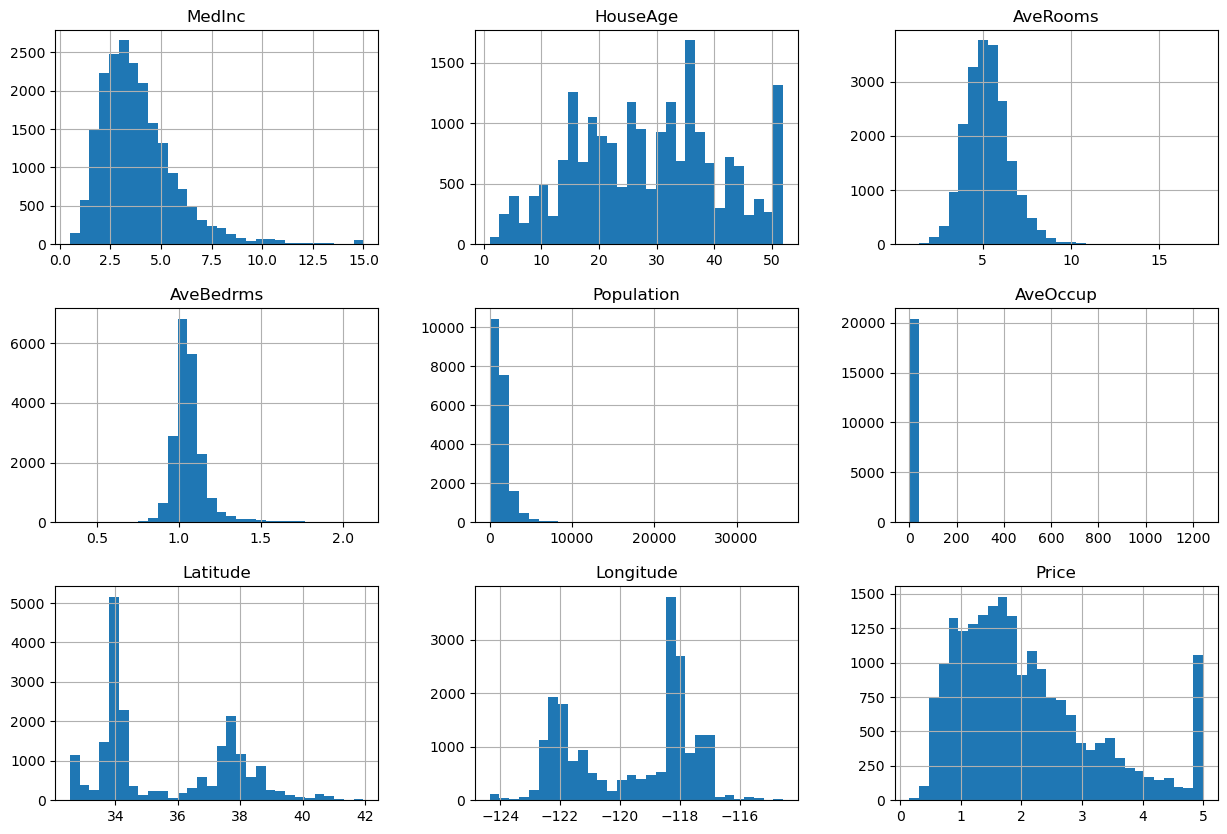

In [10]:
#さっきより正規性UP!!!!!やったぁ！
df_1.hist(bins=30, figsize=(15, 10))

/Users/tocochan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tocochan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tocochan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tocochan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: ylabel='AveOccup'>

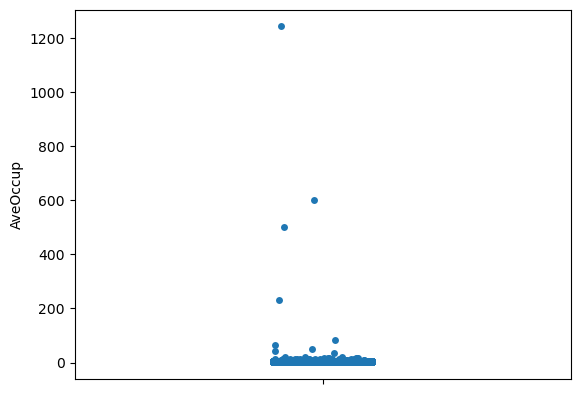

In [11]:
#次に気になるのがAveOccupの項目。
#詳しくチェックするために散布図を表示
import seaborn as sns
sns.stripplot(data = df['AveOccup'])

In [12]:
q = df_1['AveOccup'].quantile(0.99)
df_2 = df_1[df_1['AveOccup'] < q]

#確かにデータ数が減ってる2
print(len(df_1['AveOccup']))
print(len(df_2['AveOccup']))

20433
20228


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

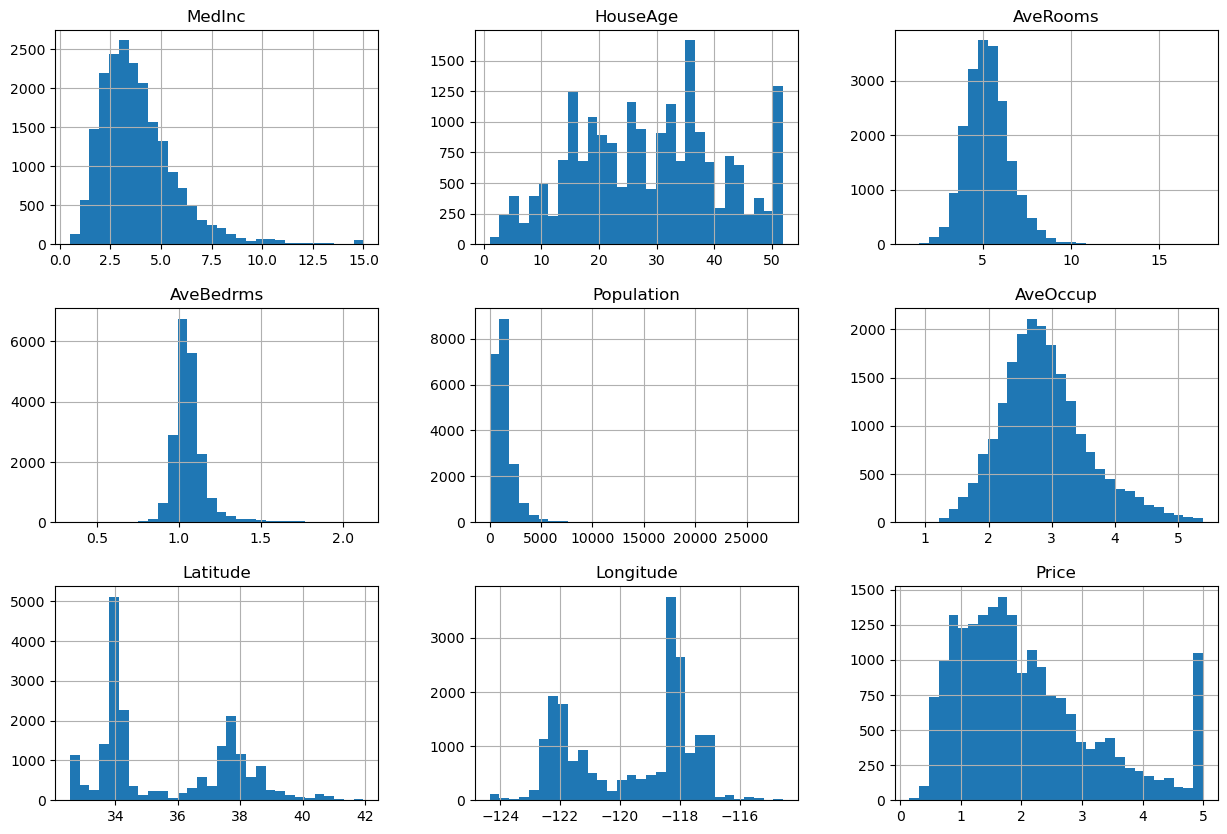

In [13]:
df_2.hist(bins=30, figsize=(15, 10))

In [14]:
#次に気になるのはPriceの最大値
df.query('Price == 5')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
4719,3.5556,25.0,4.022013,1.039308,1183.0,1.860063,34.06,-118.38,5.0
4823,2.3536,26.0,2.826563,1.000000,2543.0,3.973438,34.05,-118.31,5.0
5301,2.2444,20.0,2.977011,1.117595,2667.0,2.358090,34.06,-118.45,5.0
5308,4.7109,32.0,4.508393,1.043165,798.0,1.913669,34.05,-118.44,5.0
6776,6.0199,49.0,5.752412,0.926045,848.0,2.726688,34.12,-118.15,5.0
8290,3.6250,29.0,4.213518,1.087558,1059.0,1.626728,33.72,-118.16,5.0
8299,5.8408,52.0,5.411765,1.002451,791.0,1.938725,33.77,-118.14,5.0
8933,3.6121,29.0,4.006961,1.111369,741.0,1.719258,34.00,-118.48,5.0
9810,6.7770,23.0,8.103960,1.143564,1480.0,2.442244,36.58,-121.94,5.0
9850,1.2656,19.0,3.791908,1.156069,248.0,1.433526,36.60,-121.89,5.0


In [15]:
df_3 = df_2[df_2['Price'] < 5]

#確かにデータ数が減ってる3
print(len(df_2['Price']))
print(len(df_3['Price']))

20228
19245


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

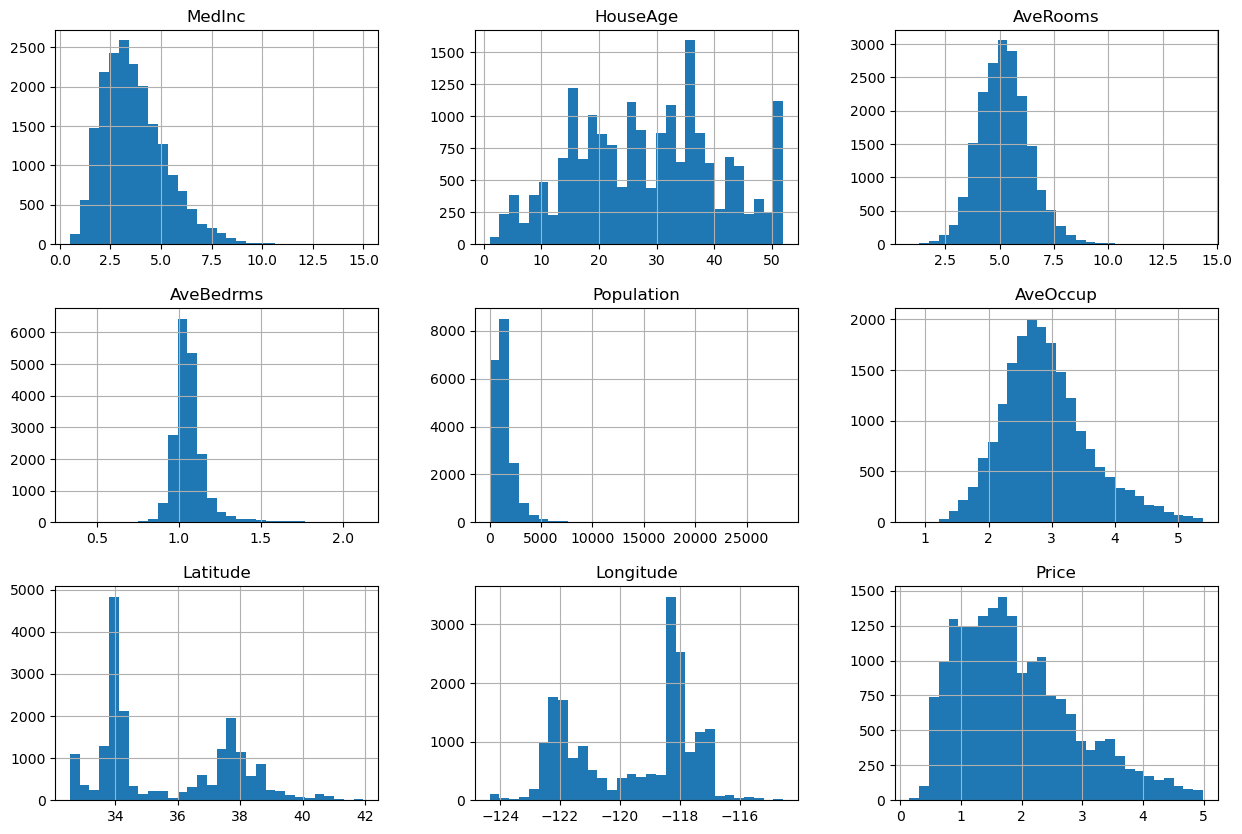

In [16]:
df_3.hist(bins=30, figsize=(15, 10))

In [17]:
#最後に気になるのがHouseAge
df_4 = df_3[df_3['HouseAge'] < 50]

#確かにデータ数が減ってる4
print(len(df_3['Price']))
print(len(df_4['Price']))

19245
18008


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

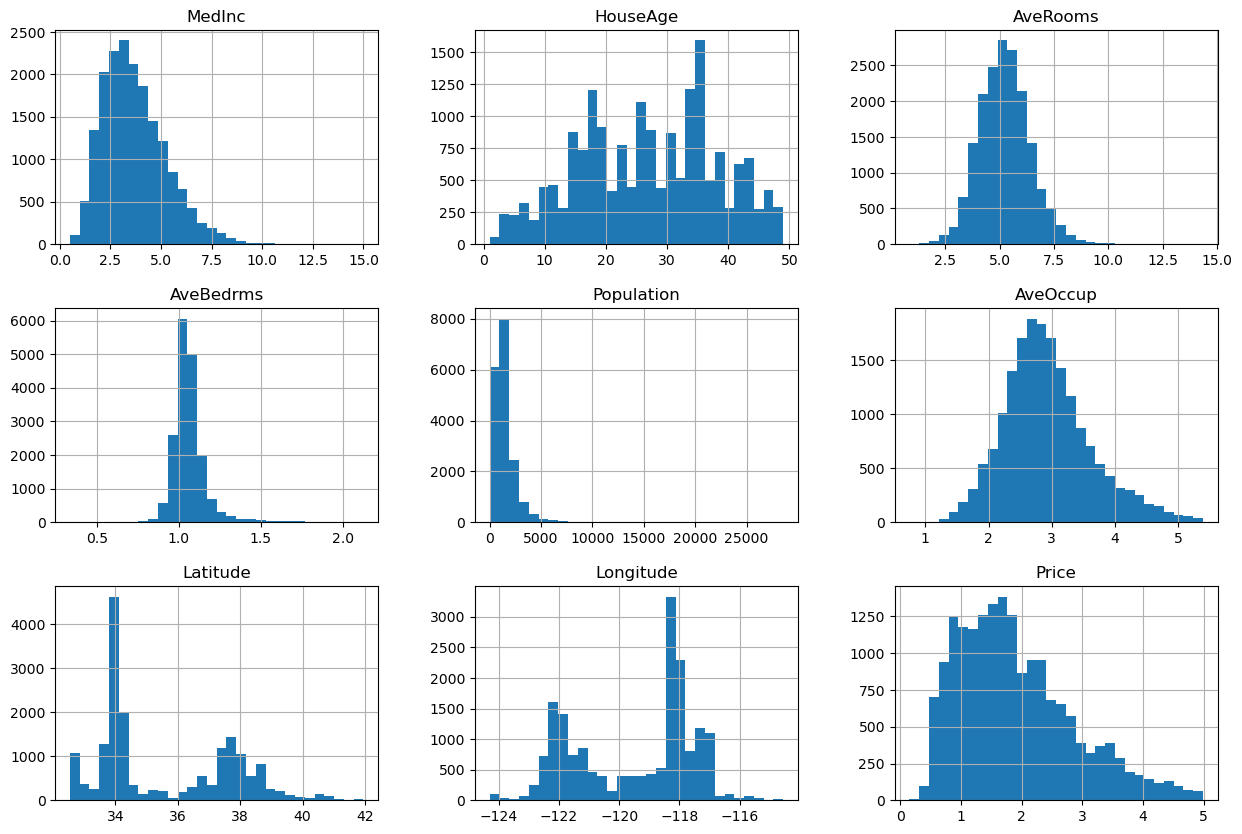

In [18]:
df_4.hist(bins=30, figsize=(15, 10))

/Users/tocochan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tocochan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Latitude', ylabel='Longitude'>

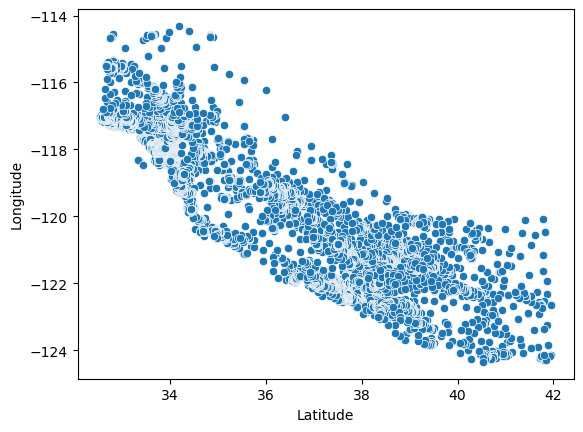

In [19]:
#LatitudeとLongitudeについては問題なさそう。
sns.scatterplot(data=df, x='Latitude', y='Longitude')

In [20]:
#ここからは微調整。
#まずはPriceから。

#既に 「正規分布っぽく」 はなってるので、３σ法を適用
mean = df_4.mean()
sigma = df_4.std()

df_5 = df_4

#３σ法の上下限値を設定
low = mean['Price'] - 3 * sigma['Price']
high = mean['Price'] + 3 * sigma['Price']
# 条件での絞込み
df_5 = df_4[(df_4['Price'] > low) & (df_4['Price'] < high)]

#確かにデータ数が減ってる5
print(len(df_４['Price']))
print(len(df_5['Price']))

18008
17922


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

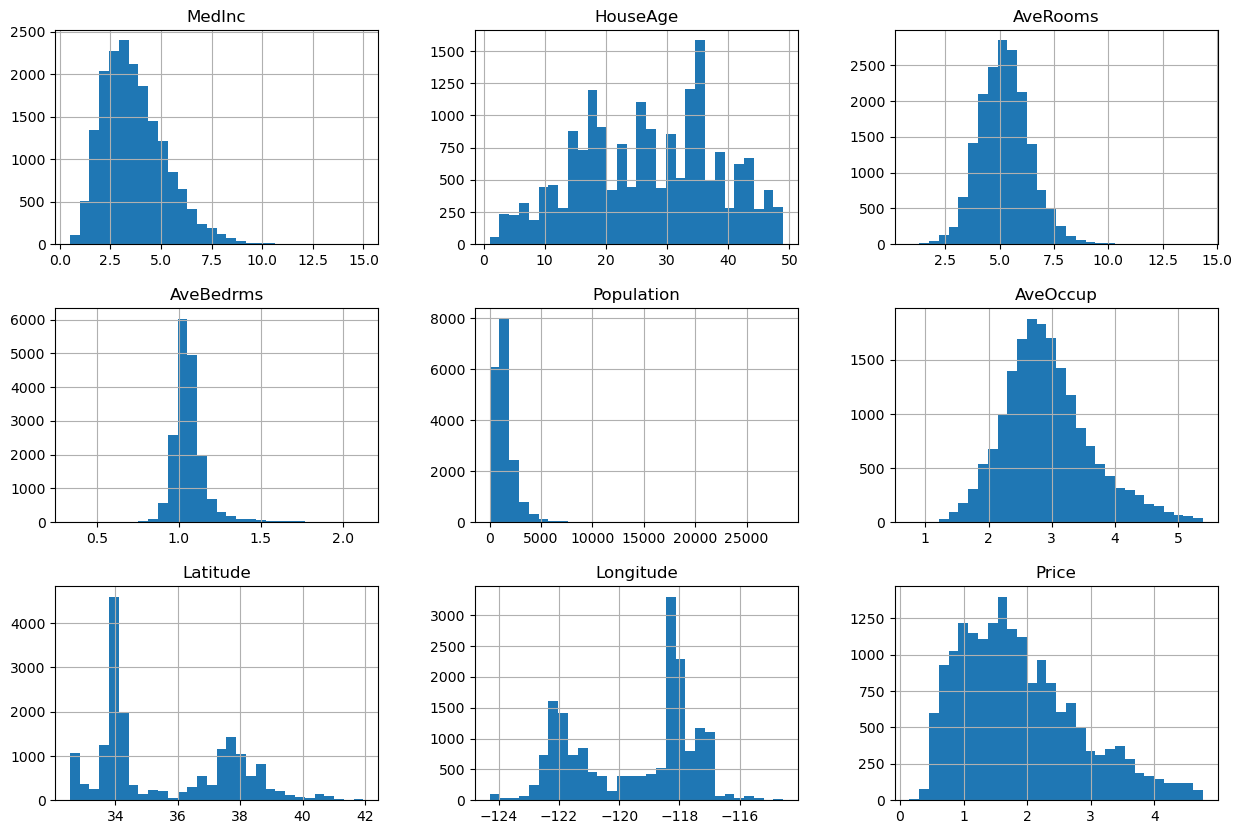

In [21]:
df_5.hist(bins=30, figsize=(15, 10))

In [22]:
#いよいよ重回帰分析

#住宅価格以外のデータを説明変数Xに設定
X = df_5.iloc[:,0:8].values
#住宅価格を目的変数yに設定
y = df_5['Price'].values

In [23]:
#訓練データとテストデータに8:2で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) #seedを固定することで、常に同じように分割される

In [24]:
X_train_std = X_train
X_test_std = X_test
##特徴量の標準化
#sc = StandardScaler()
##訓練データで標準化モデルを作成し変換
#X_train_std = sc.fit_transform(X_train)
##作成した標準化モデルでテストデータを変換
#X_test_std = sc.transform(X_test)
##標準化された訓練データ
#X_train_std[0]

In [25]:
#線形回帰モデルの作成
model = LinearRegression()
#モデルの学習
model.fit(X_train_std,y_train)

#訓練データ、テストデータの住宅価格を予測
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

In [26]:
#傾きと切片の確認
print('傾き： ' , model.coef_)
print('切片： ' ,  model.intercept_)

傾き：  [ 4.29656704e-01  8.23708374e-03 -1.18761208e-01  9.07555789e-01
  3.61275199e-05 -3.04713714e-01 -3.79041676e-01 -3.75183518e-01]
切片：  -30.765677523776176


In [27]:
#平均2乗誤差 MSE (モデルの評価指標の一つで、この値が低いほどGOOD) の計算
MSE_train_5 = np.mean((y_train_pred - y_train) ** 2)
MSE_test_5 = np.mean((y_test_pred - y_test) ** 2)
print('MSE train: ', MSE_train_5)
print('MSE test:', MSE_test_5)

MSE train:  0.3112084158634736
MSE test: 0.30833637745396913


In [28]:
#別解法
print(mean_squared_error(y_train_pred, y_train))
print(mean_squared_error(y_test_pred, y_test))

0.3112084158634736
0.30833637745396913


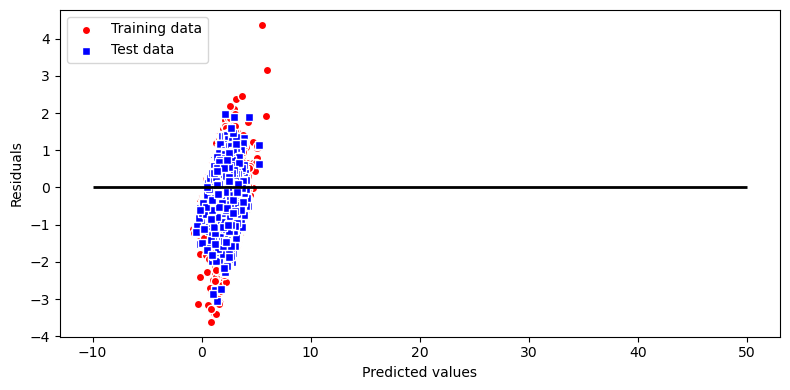

In [29]:
#残差プロット

plt.figure(figsize = (8,4)) #プロットのサイズ指定

plt.scatter(y_train_pred, y_train_pred - y_train,
                   c = 'red', marker = 'o', edgecolors='white',
                   label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
                   c = 'blue', marker='s', edgecolors='white',
                   label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10,xmax=50,color='black', lw=2)
plt.tight_layout()

plt.show()

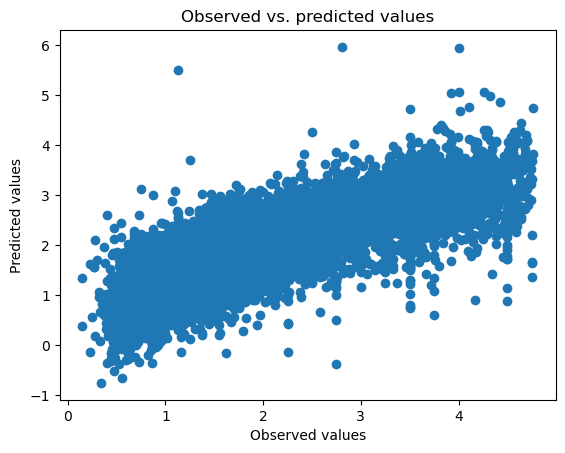

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_pred)
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.title("Observed vs. predicted values")
plt.show()

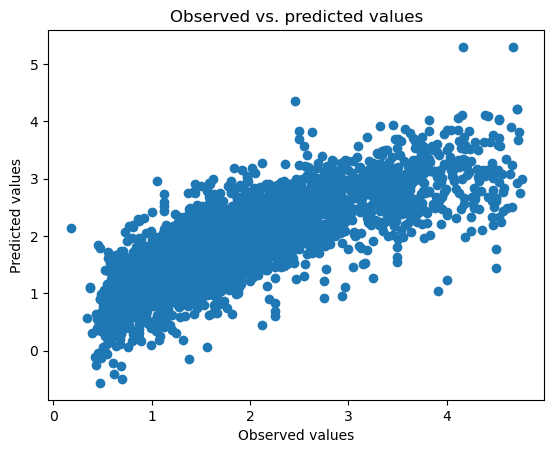

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.title("Observed vs. predicted values")
plt.show()